In [ ]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

In [2]:
cancer_data = pd.read_csv("Breast Cancer.csv")

display(cancer_data.head(2))
display(cancer_data.tail(2))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [3]:
rows, cols = cancer_data.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 569
Columns: 32


In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print("Categorical features:")
cancer_data.select_dtypes('object').columns

Categorical features:


Index(['diagnosis'], dtype='object')

In [6]:
print("Numerical features:")
cancer_data.select_dtypes('number').columns

Numerical features:


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
print("Number of categories in 'diagnosis' is", cancer_data['diagnosis'].nunique())
print("The categories are:", cancer_data['diagnosis'].unique())

Number of categories in 'diagnosis' is 2
The categories are: ['M' 'B']


In [10]:
print("Value breakdown of diagnosis types.")
cancer_data['diagnosis'].value_counts(normalize=True)

Value breakdown of diagnosis types.


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [11]:
print("Null values in the data.")
cancer_data.isna().sum()

Null values in the data.


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
print("Outliers in data.")
cancer_data.select_dtypes(include='number').skew()

Outliers in data.


id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

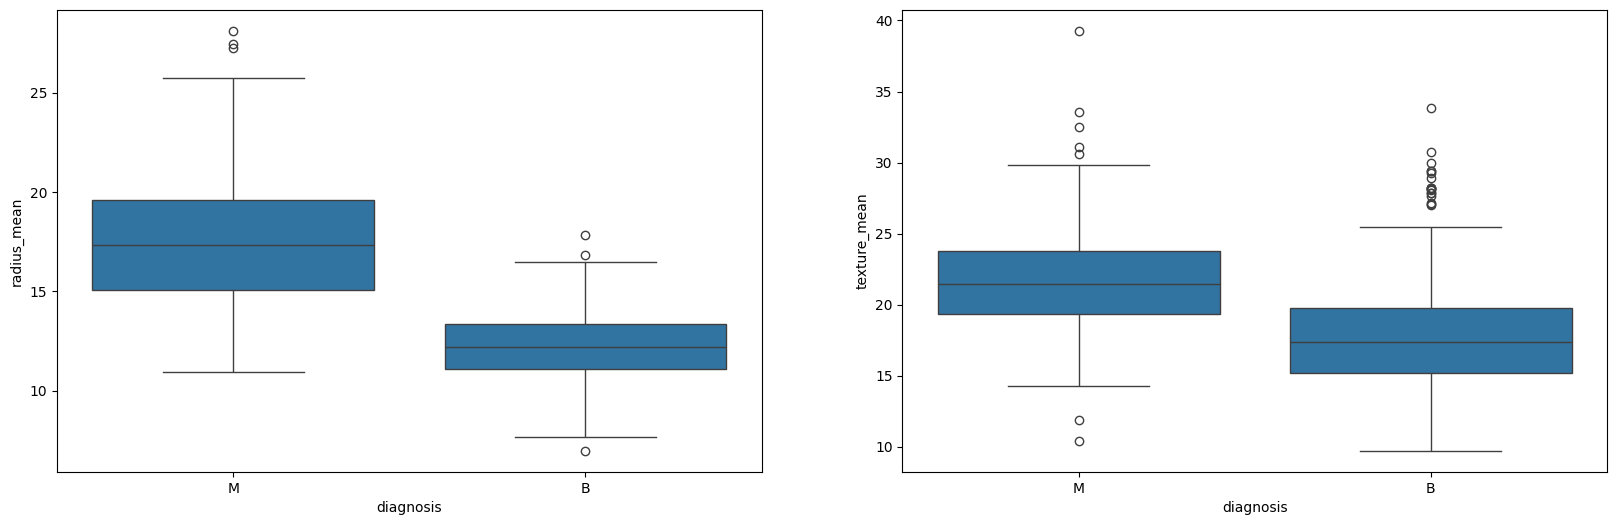

In [13]:
fig, (a, b) = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(data=cancer_data, x='diagnosis', y='radius_mean', ax=a)
sns.boxplot(data=cancer_data, x='diagnosis', y='texture_mean', ax=b)

In [14]:
cancer_data.dropna(inplace=True)
cancer_data.isna().sum().sum()

0

In [15]:
for col in cancer_data.columns:
    if col != 'diagnosis':
        q1 = cancer_data[col].quantile(0.25)
        q3 = cancer_data[col].quantile(0.75)
        cancer_data.loc[cancer_data[col] < q1, col] = q1
        cancer_data.loc[cancer_data[col] > q3, col] = q3

cancer_data.select_dtypes(include='number').skew()

id                         0.757462
radius_mean                0.180901
texture_mean               0.032637
perimeter_mean             0.224847
area_mean                  0.283556
smoothness_mean            0.009674
compactness_mean           0.113562
concavity_mean             0.288566
concave points_mean        0.359991
symmetry_mean             -0.006337
fractal_dimension_mean     0.066417
radius_se                  0.256788
texture_se                 0.105222
perimeter_se               0.209152
area_se                    0.472063
smoothness_se              0.184937
compactness_se             0.205043
concavity_se               0.223026
concave points_se          0.058448
symmetry_se                0.164370
fractal_dimension_se       0.190018
radius_worst               0.336255
texture_worst              0.031050
perimeter_worst            0.325985
area_worst                 0.416762
smoothness_worst          -0.034230
compactness_worst          0.281968
concavity_worst            0

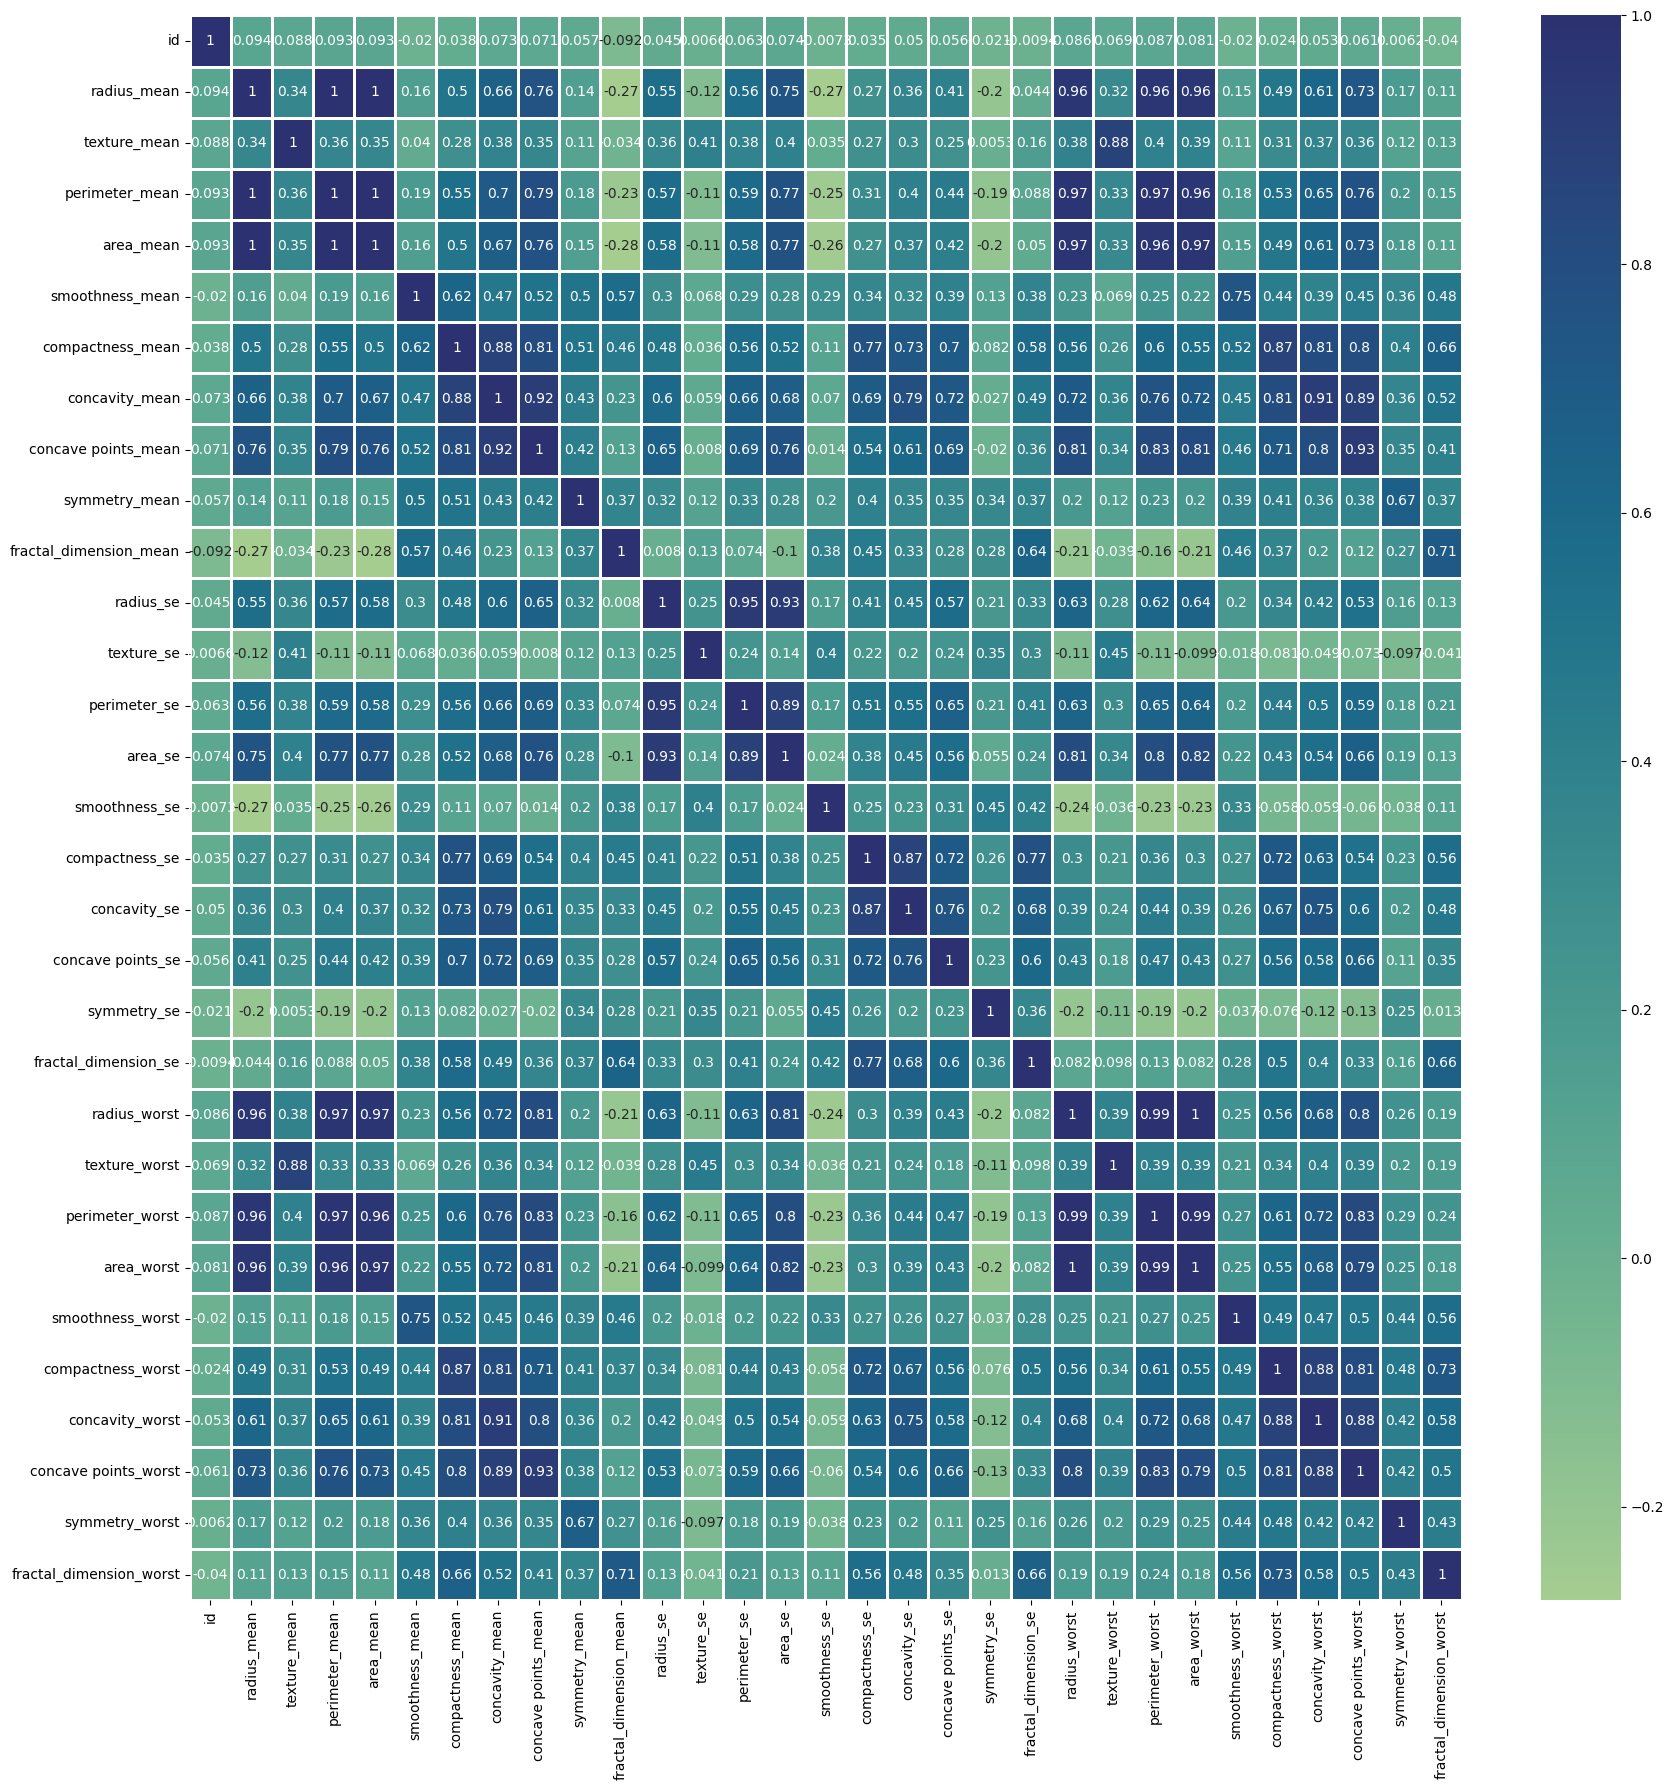

In [16]:
plt.figure(figsize=(18, 18))
sns.heatmap(cancer_data.select_dtypes('number').corr(), annot=True, cmap='crest', linewidths=0.8)
plt.tight_layout()
plt.show()

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

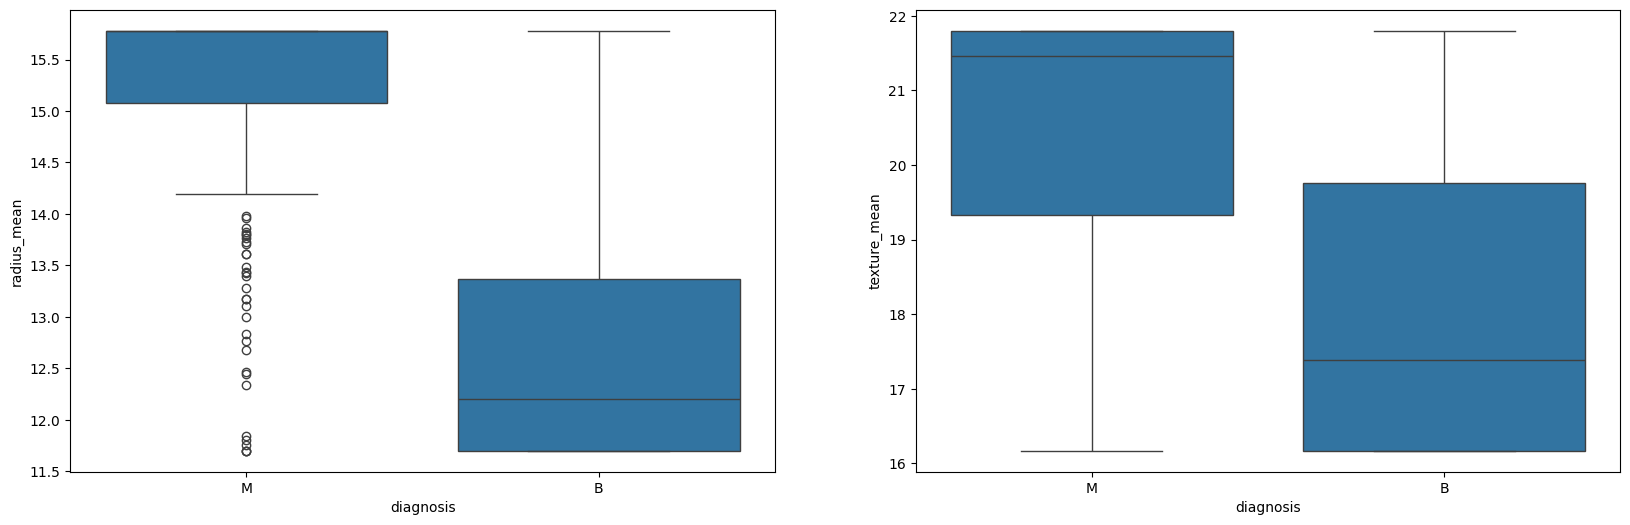

In [17]:
fig, (a, b) = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(data=cancer_data, x='diagnosis', y='radius_mean', ax=a)
sns.boxplot(data=cancer_data, x='diagnosis', y='texture_mean', ax=b)

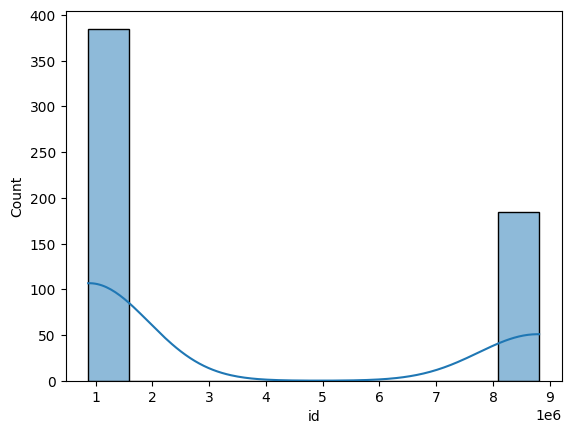

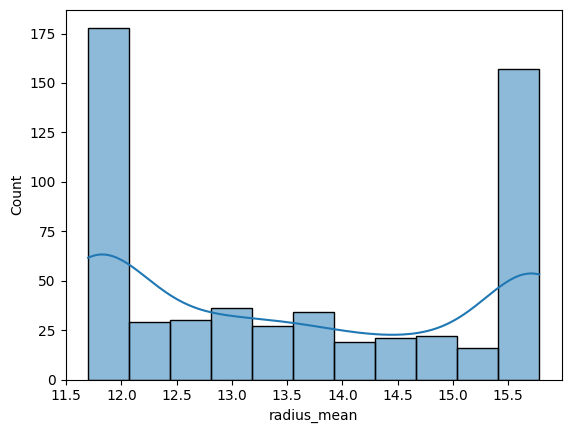

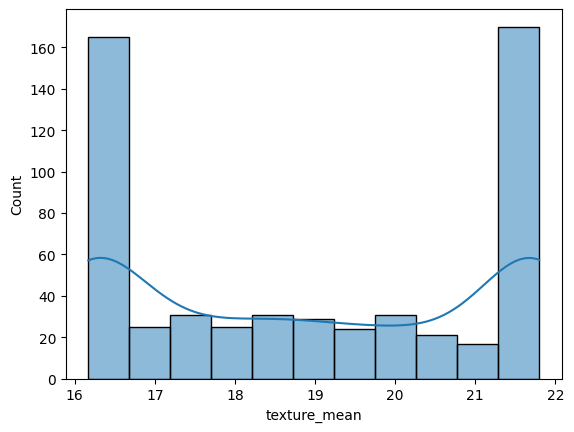

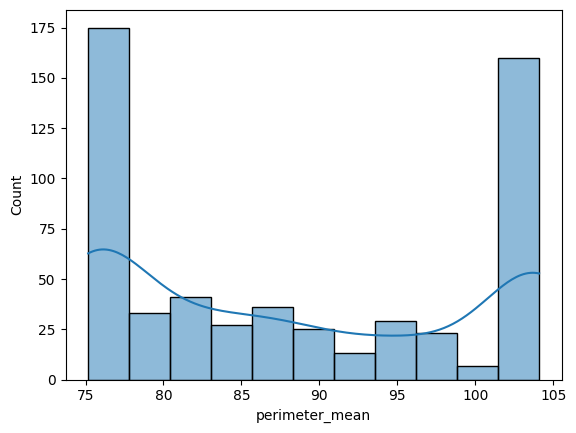

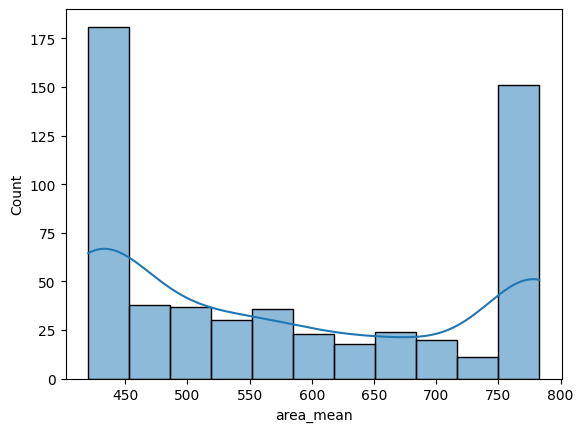

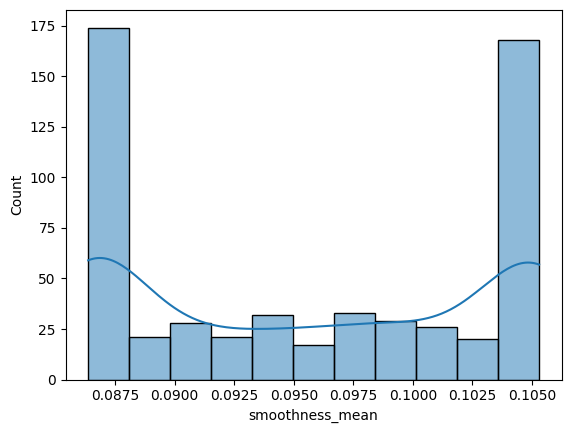

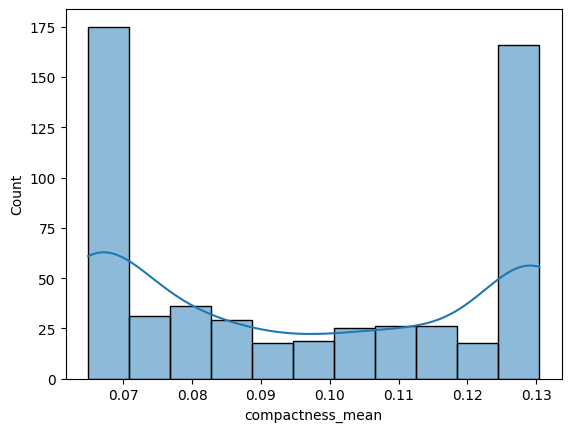

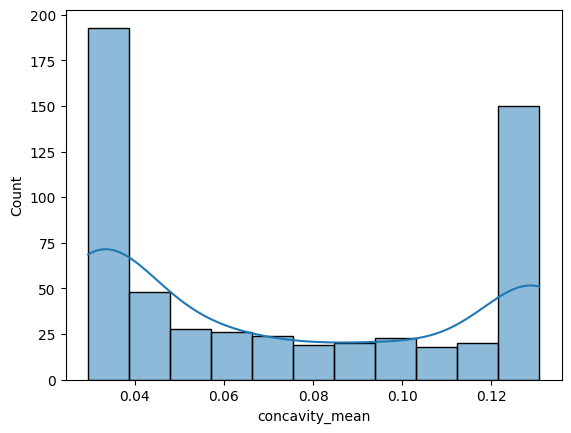

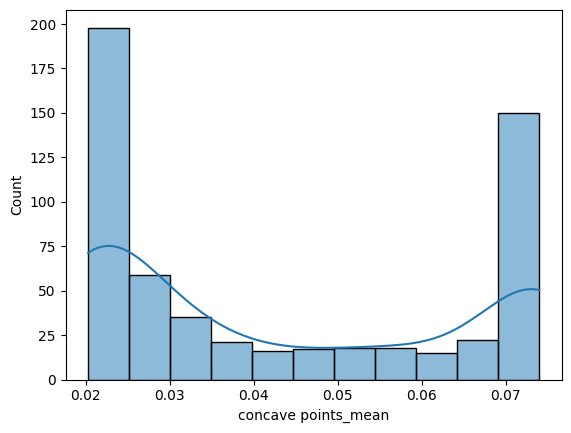

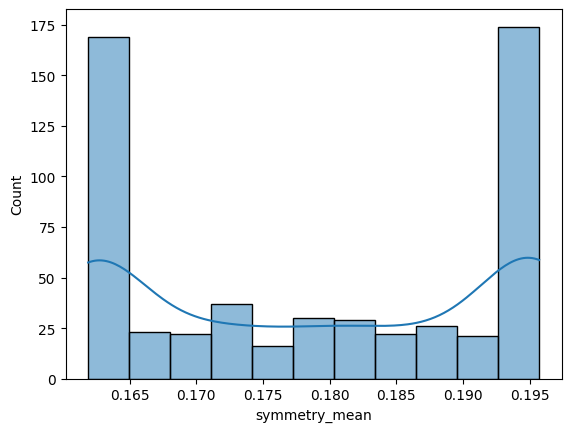

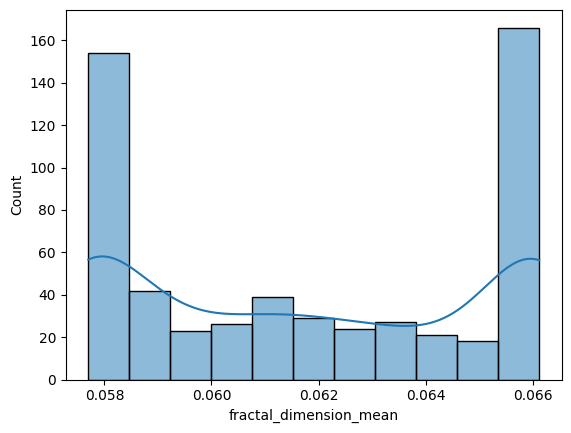

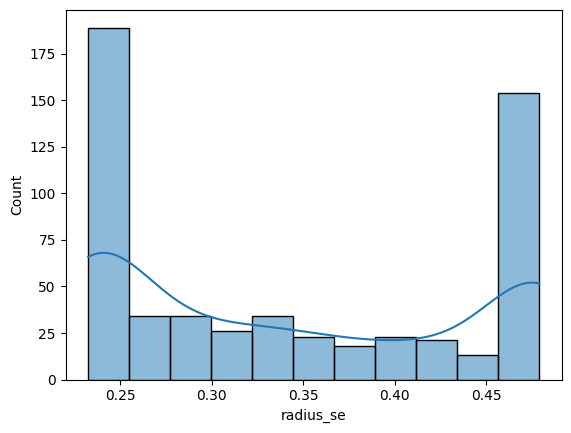

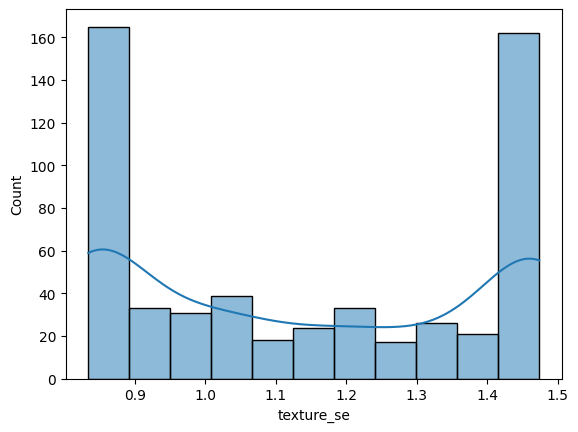

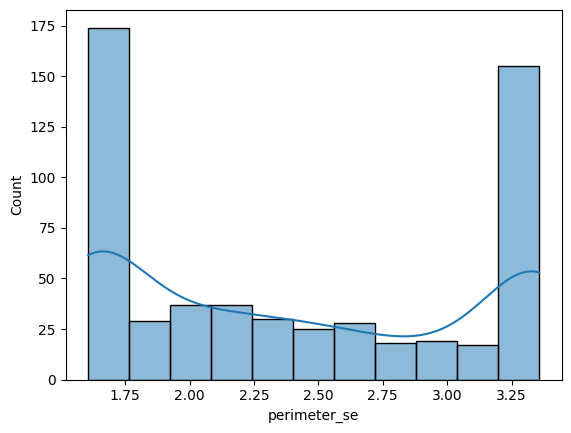

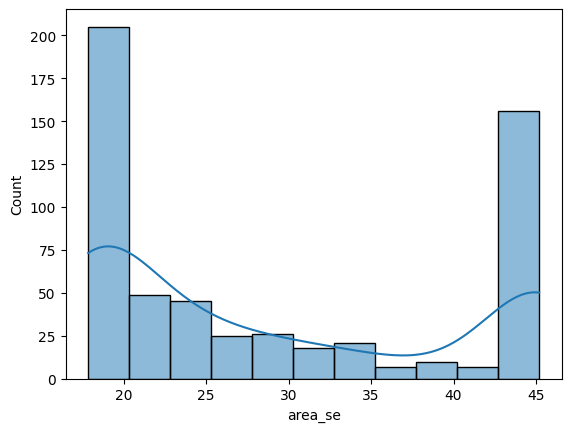

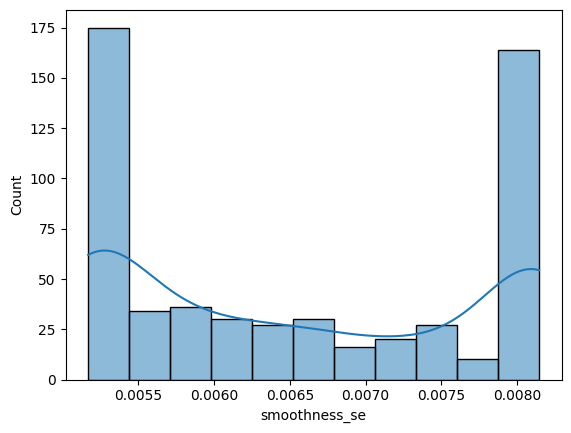

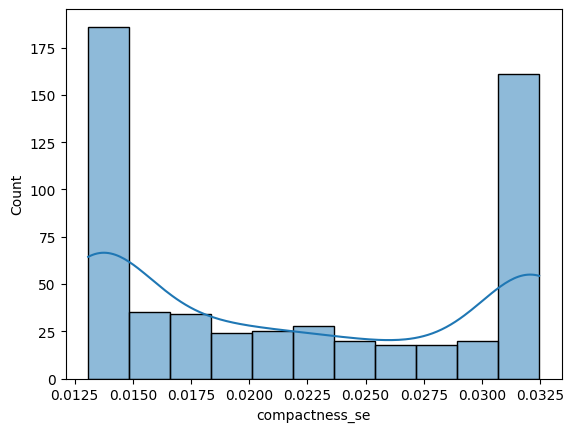

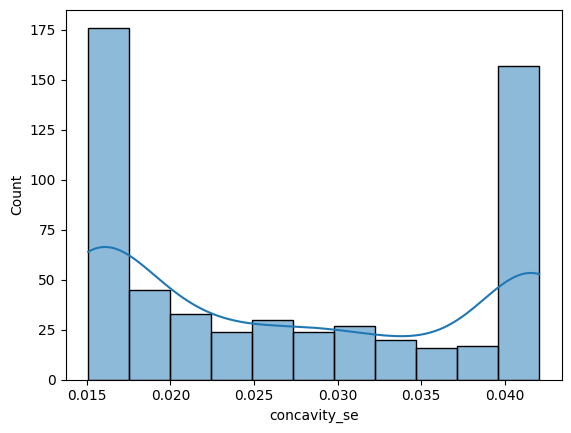

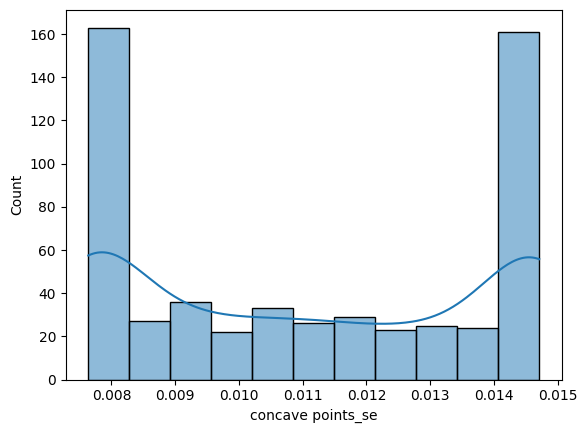

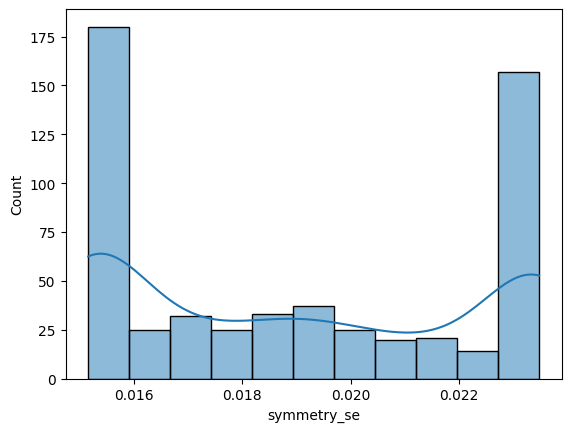

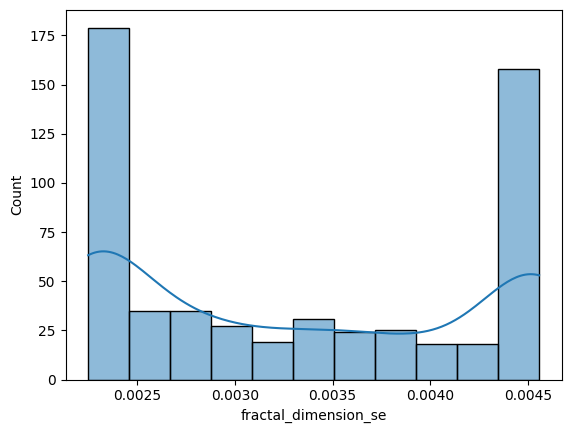

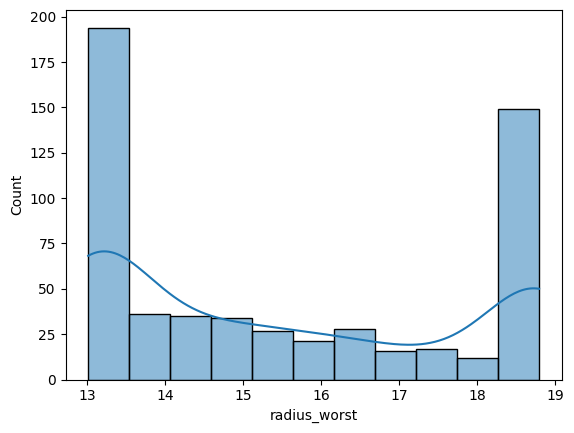

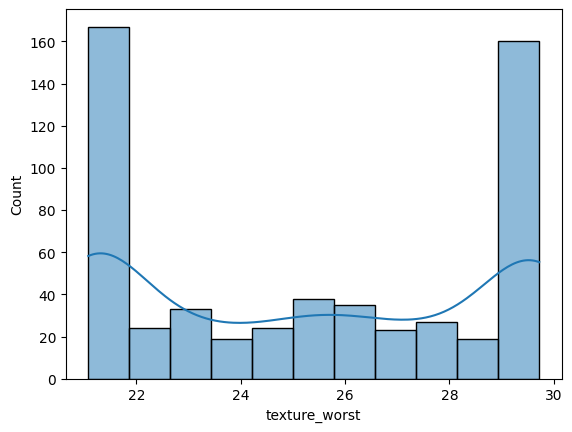

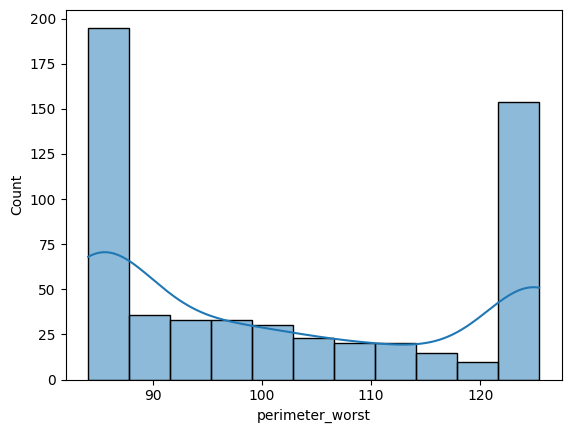

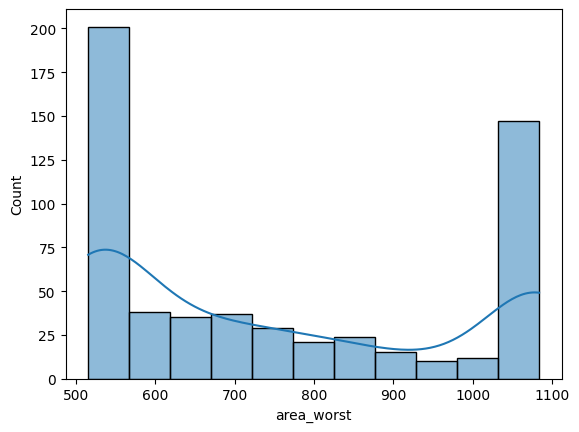

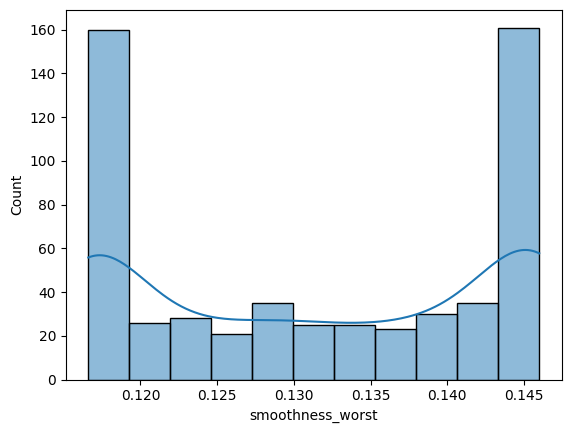

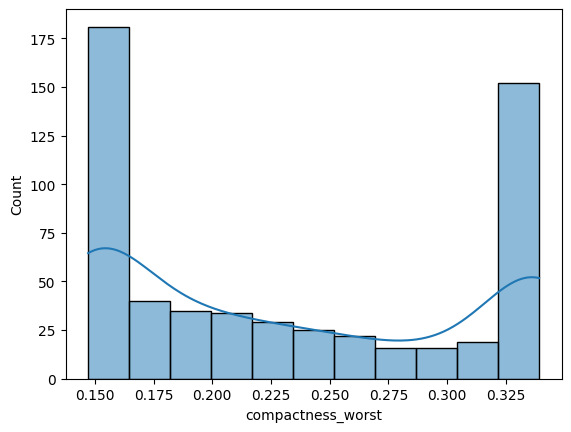

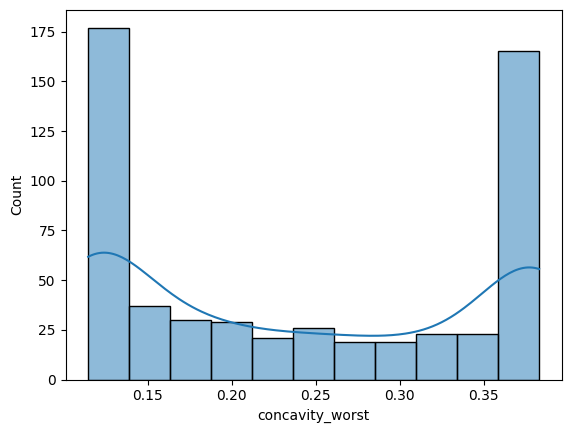

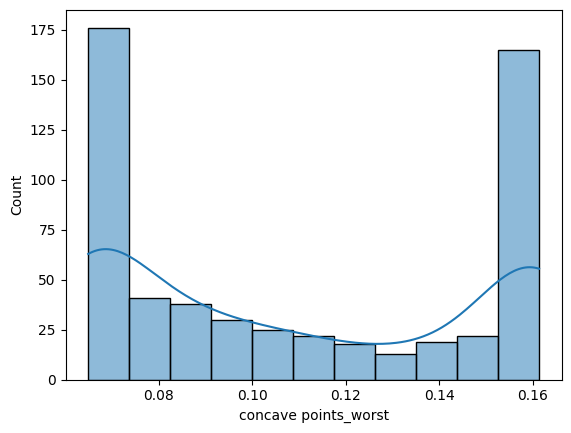

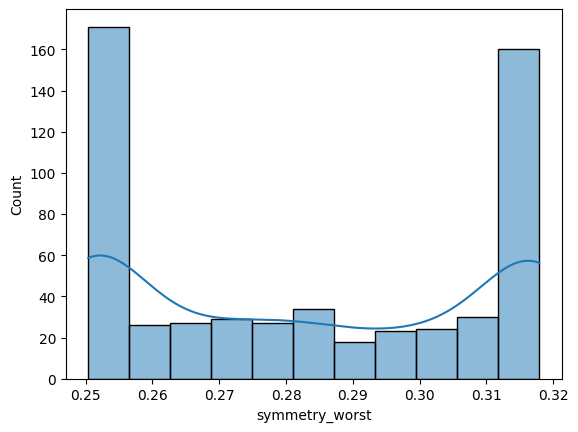

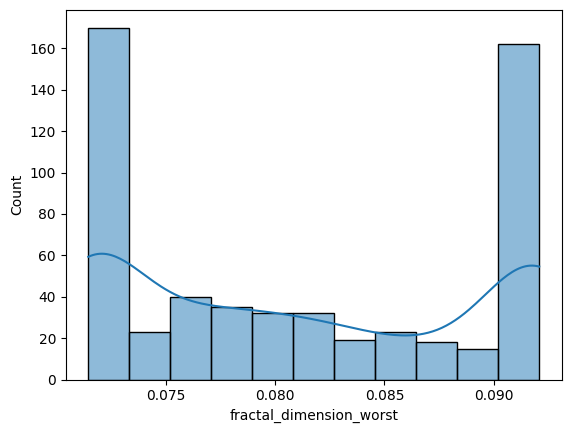

In [18]:
for feature in cancer_data.select_dtypes('number').columns:
    sns.histplot(cancer_data[feature], kde=True)
    plt.show()

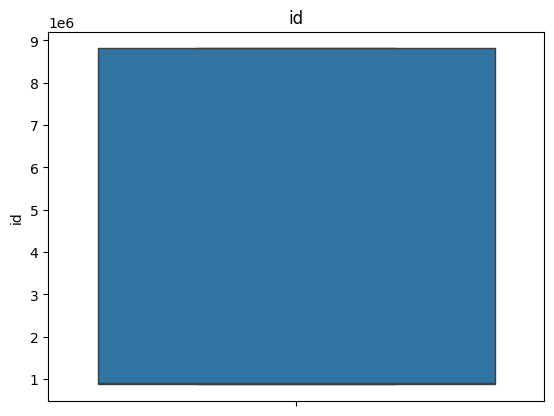

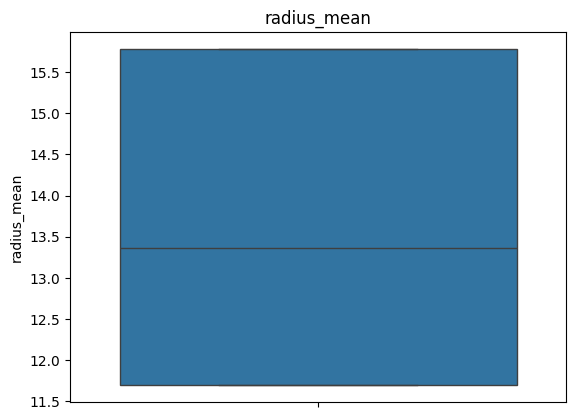

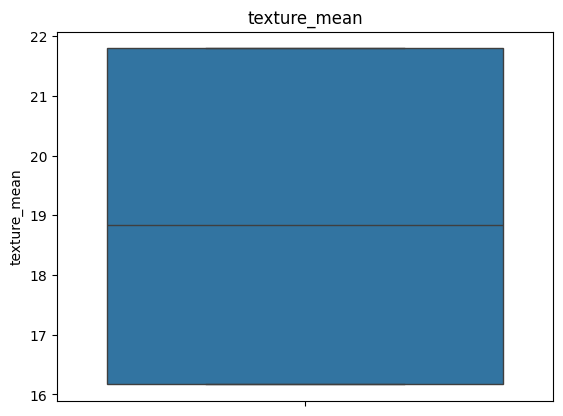

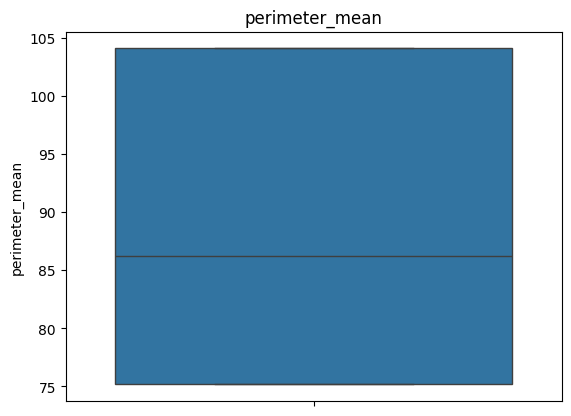

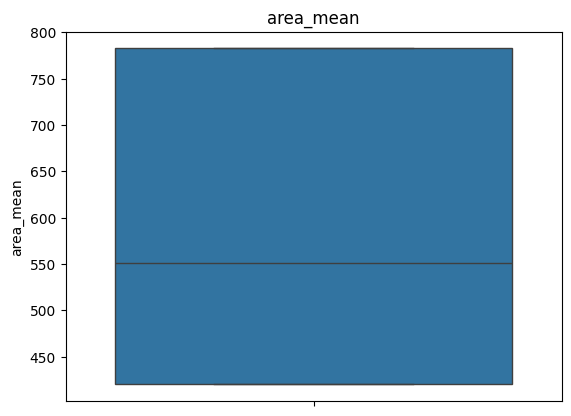

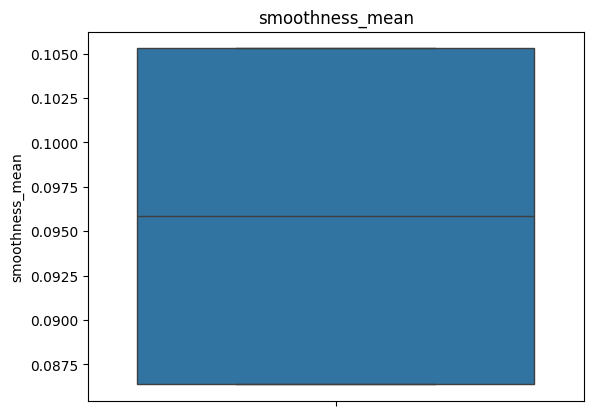

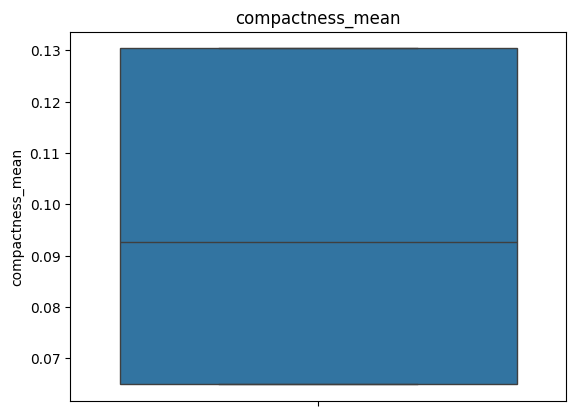

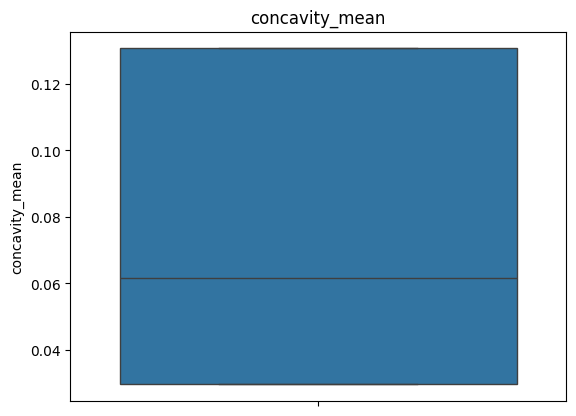

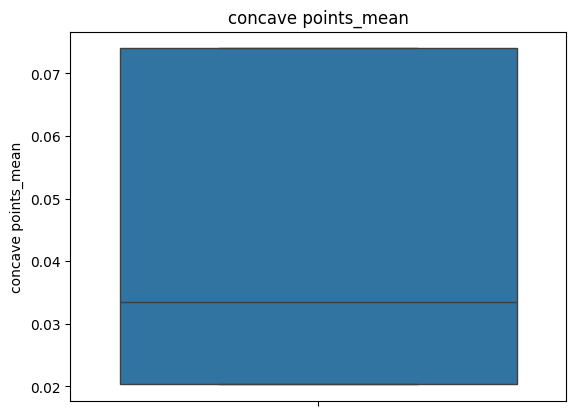

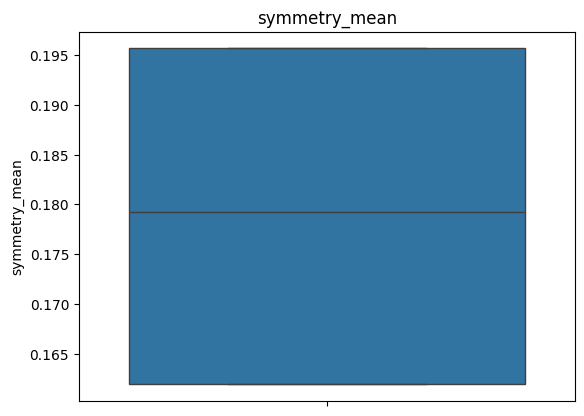

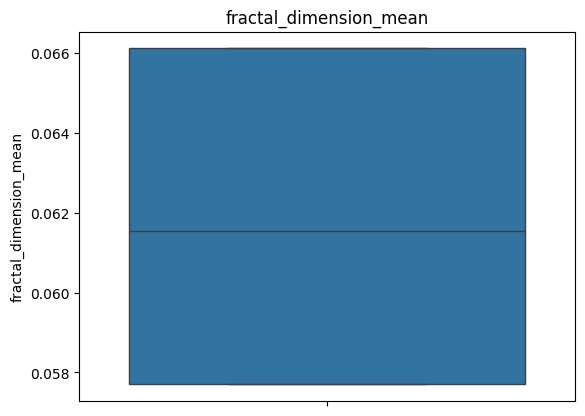

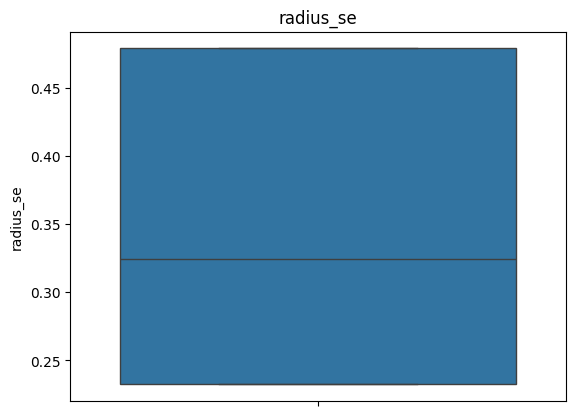

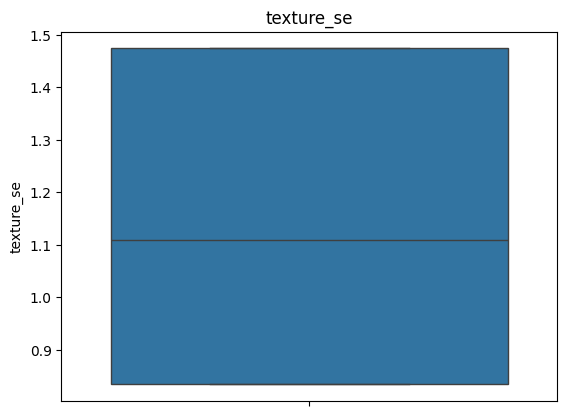

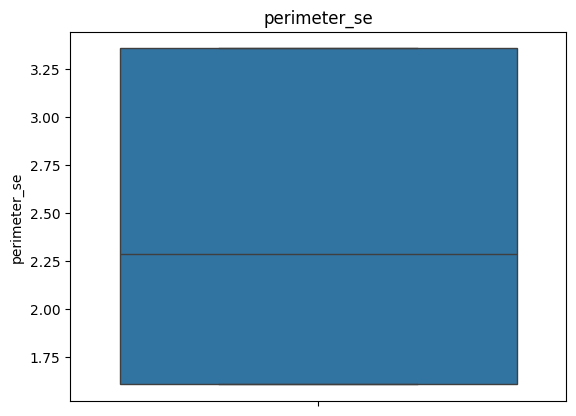

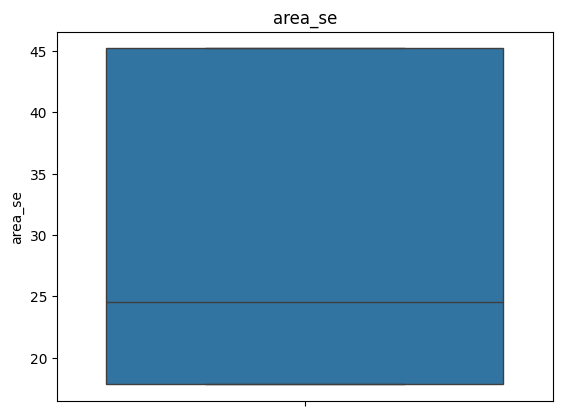

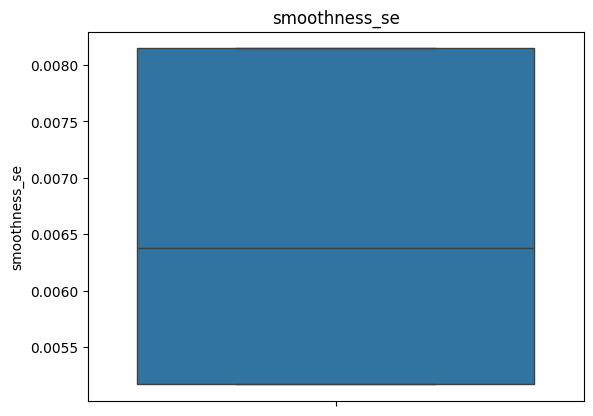

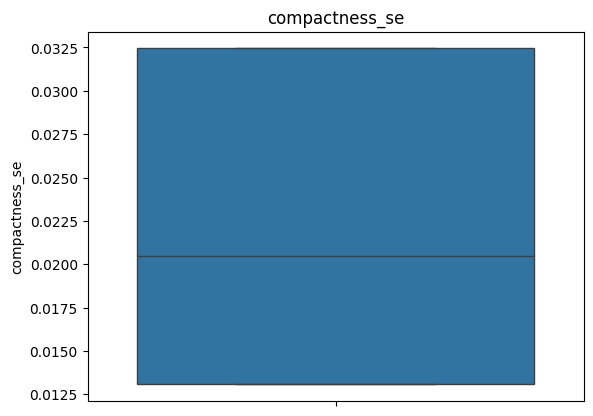

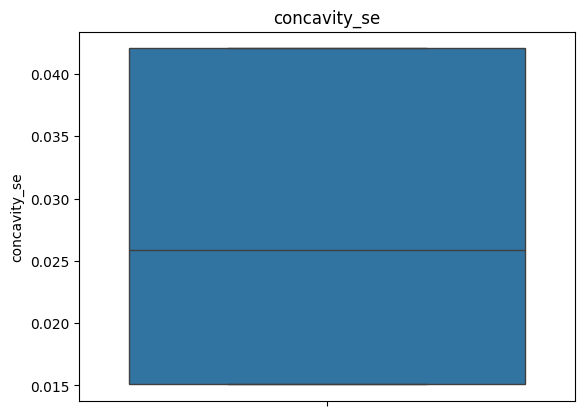

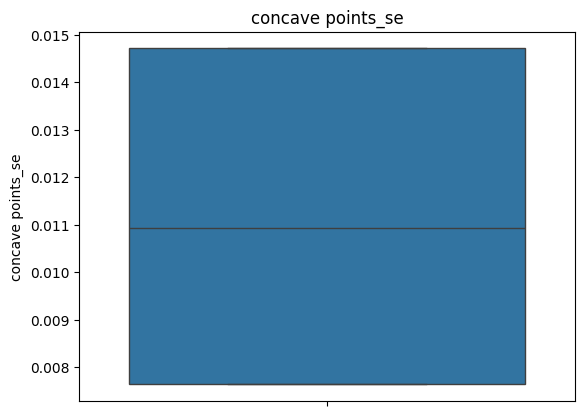

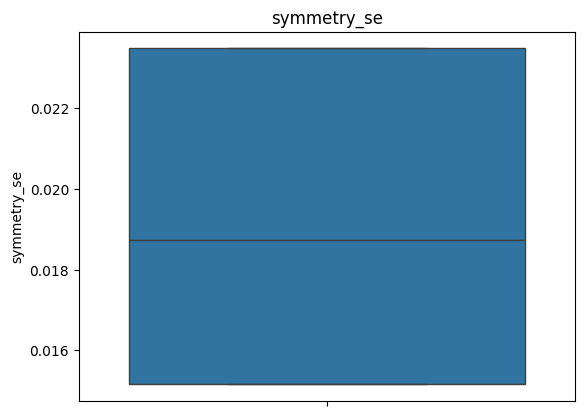

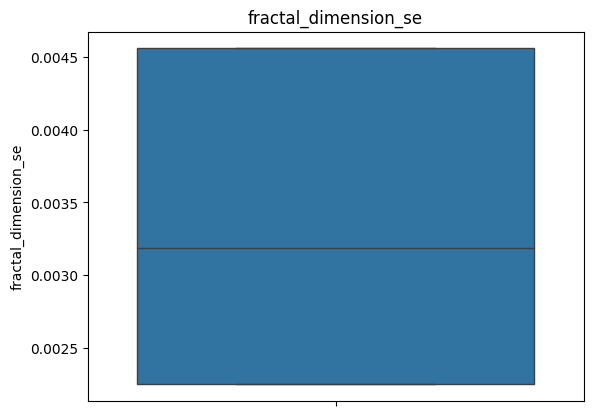

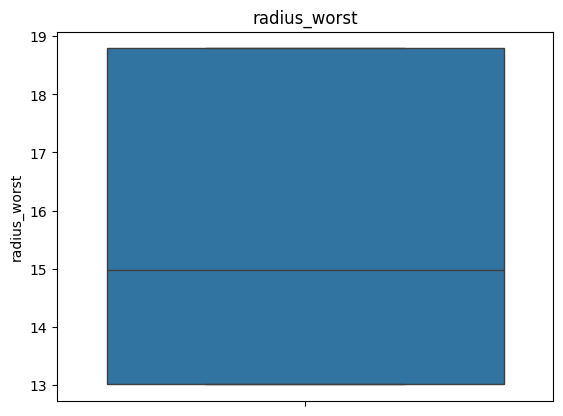

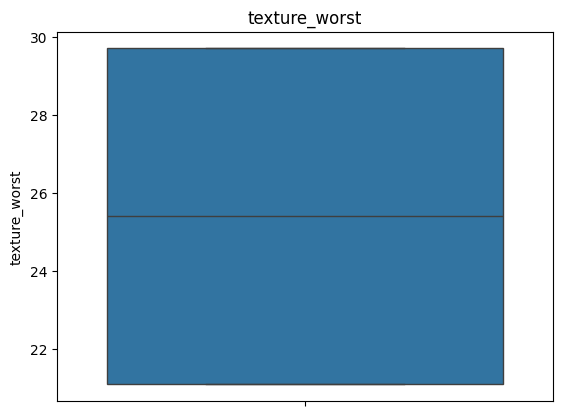

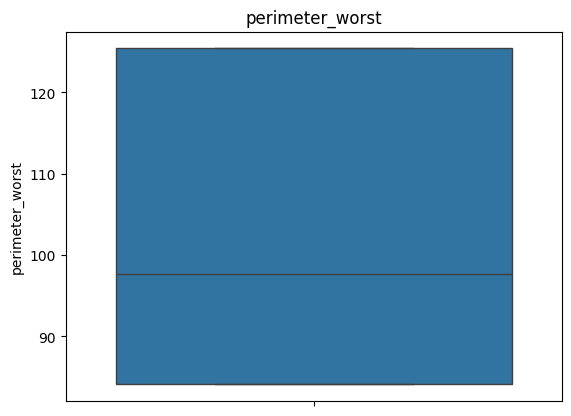

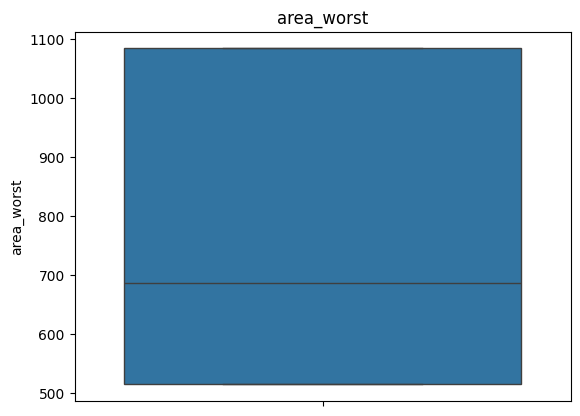

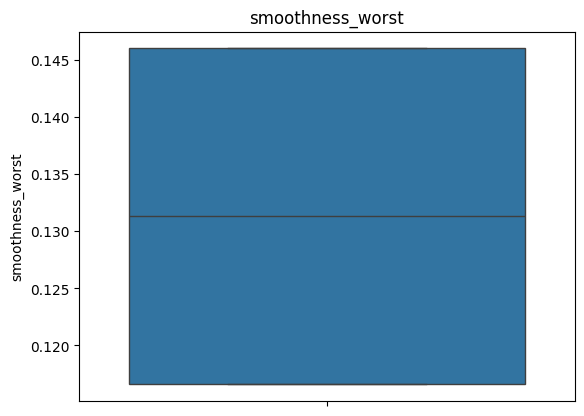

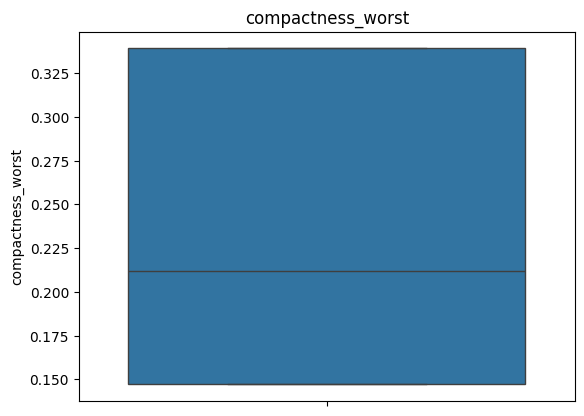

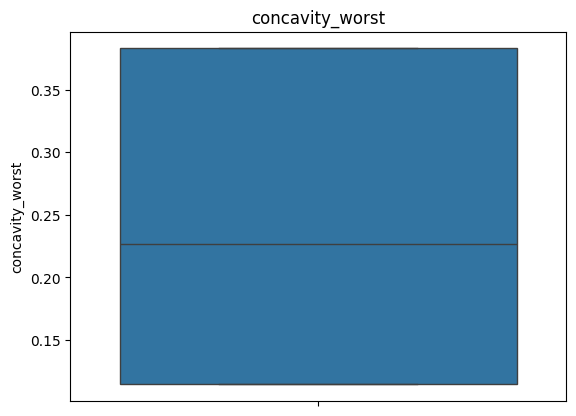

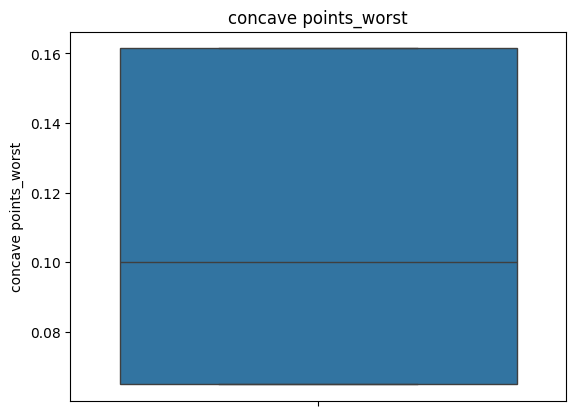

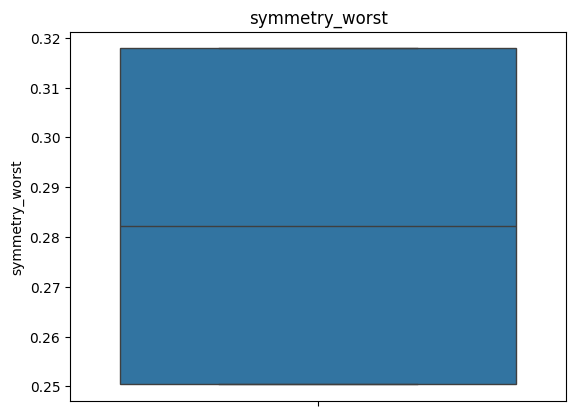

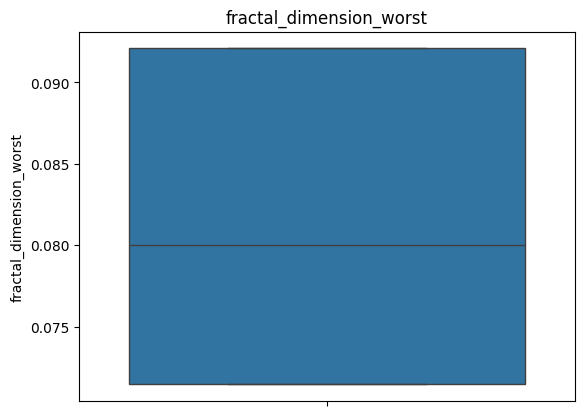

In [19]:
for feature in cancer_data.select_dtypes('number').columns:
    sns.boxplot(cancer_data[feature])
    plt.title(feature)
    plt.show()

In [20]:
print("Checking standard deviation of data.")
cancer_data.select_dtypes('number').std()

Checking standard deviation of data.


id                         3.697968e+06
radius_mean                1.652761e+00
texture_mean               2.284473e+00
perimeter_mean             1.172177e+01
area_mean                  1.462004e+02
smoothness_mean            7.734253e-03
compactness_mean           2.694898e-02
concavity_mean             4.164479e-02
concave points_mean        2.221417e-02
symmetry_mean              1.383655e-02
fractal_dimension_mean     3.385123e-03
radius_se                  1.005252e-01
texture_se                 2.601825e-01
perimeter_se               7.058648e-01
area_se                    1.122295e+01
smoothness_se              1.214794e-03
compactness_se             7.974552e-03
concavity_se               1.097643e-02
concave points_se          2.855781e-03
symmetry_se                3.363333e-03
fractal_dimension_se       9.418569e-04
radius_worst               2.343422e+00
texture_worst              3.482803e+00
perimeter_worst            1.684448e+01
area_worst                 2.303984e+02


In [21]:
print("Encoding categorical data.")
label_encoding = LabelEncoder()
cancer_data['diagnosis'] = label_encoding.fit_transform(cancer_data['diagnosis'])

Encoding categorical data.


In [22]:
cancer_data.diagnosis.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

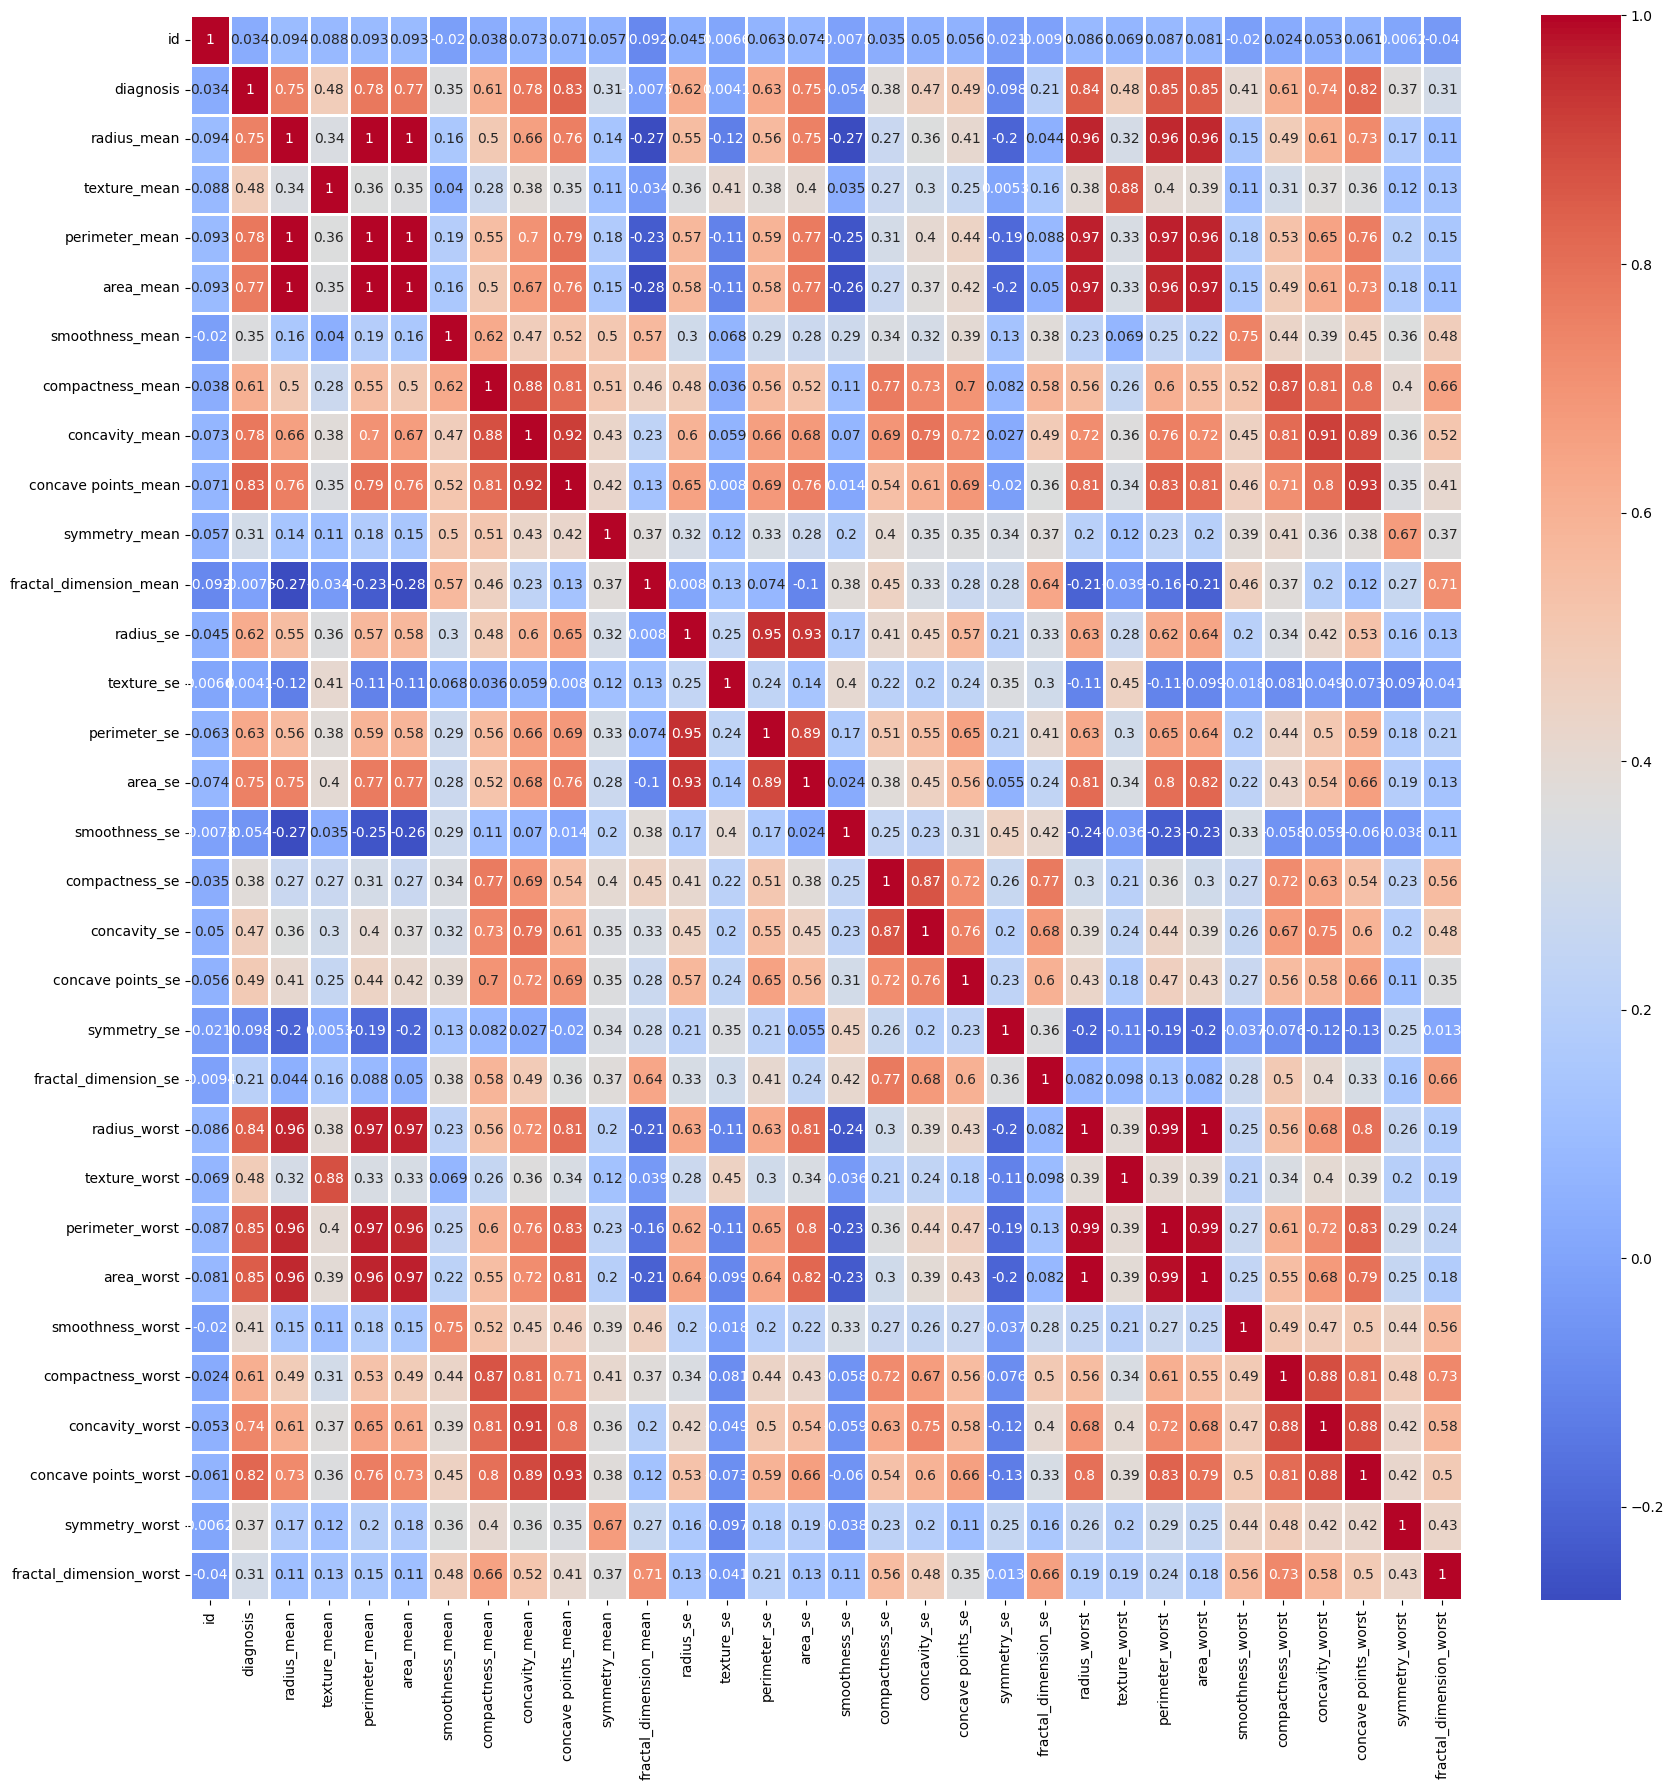

In [23]:
plt.figure(figsize=(18, 18))
sns.heatmap(cancer_data.select_dtypes('number').corr(), annot=True, cmap='coolwarm', linewidths=0.8)
plt.tight_layout()
plt.show()

There seem to be a few features that are correlating well with the target variable. This is a good thing. It will help make predictions easily.

In [24]:
higher_correlation = cancer_data.corr().diagnosis[cancer_data.corr().diagnosis >= 0.6].index

In [25]:
higher_correlation = list(higher_correlation) + ['diagnosis']
cancer_data = cancer_data[higher_correlation]
cancer_data.shape

(569, 17)

In [26]:
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'diagnosis'],
      dtype='object')

In [27]:
X = cancer_data.drop(labels='diagnosis', axis=1)
y = cancer_data['diagnosis']

display(X.head(2))
display(X.tail(2))
display(y.head(2))
display(y.tail(2))

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,15.78,104.1,782.7,0.13040,0.1307,0.07400,0.4789,3.357,45.19,18.79,125.4,1084.0,0.3391,0.3829,0.1614
1,15.78,104.1,782.7,0.07864,0.0869,0.07017,0.4789,3.357,45.19,18.79,125.4,1084.0,0.1866,0.2416,0.1614


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
567,15.78,104.10,782.7,0.13040,0.13070,0.07400,0.4789,3.357,45.19,18.79,125.40,1084.0,0.3391,0.3829,0.16140
568,11.70,75.17,420.3,0.06492,0.02956,0.02031,0.3857,2.548,19.15,13.01,84.11,515.3,0.1472,0.1145,0.06493


,diagnosis,diagnosis
0,1,1
1,1,1


,diagnosis,diagnosis
567,1,1
568,0,0


In [28]:
y = y.loc[:, ~y.columns.duplicated()]
y.head(2)

,diagnosis
0,1
1,1


In [29]:
inp = X.copy()
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(inp)
X = pd.DataFrame(X, columns=inp.columns)
X.head(2)

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1.320229,1.338518,1.374659,1.267724,1.359742,1.385364,1.352282,1.336879,1.437866,1.398057,1.38258,1.435548,1.365715,1.277873,1.303257
1,1.320229,1.338518,1.374659,-0.654632,0.307065,1.212800,1.352282,1.336879,1.437866,1.398057,1.38258,1.435548,-0.595664,-0.001926,1.303257


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
y.value_counts(normalize=True)

diagnosis
0            0.627417
1            0.372583
Name: proportion, dtype: float64

In [32]:
y_train.value_counts(normalize=True)

diagnosis
0            0.625628
1            0.374372
Name: proportion, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

diagnosis
0            0.631579
1            0.368421
Name: proportion, dtype: float64

In [34]:
print("From the distribution/split of data in original (universe) and the train and test (samples), it is clear "
     + "that they have the same break down of values")
print("This proves that both train and test are good representatives of the overall data.")

From the distribution/split of data in original (universe) and the train and test (samples), it is clear that they have the same break down of values
This proves that both train and test are good representatives of the overall data.


In [35]:
knn_scores = []

for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_scores.append(cross_val_score(knn_classifier, 
                                      X_train, 
                                      y_train, 
                                      cv=5, scoring='accuracy').mean())

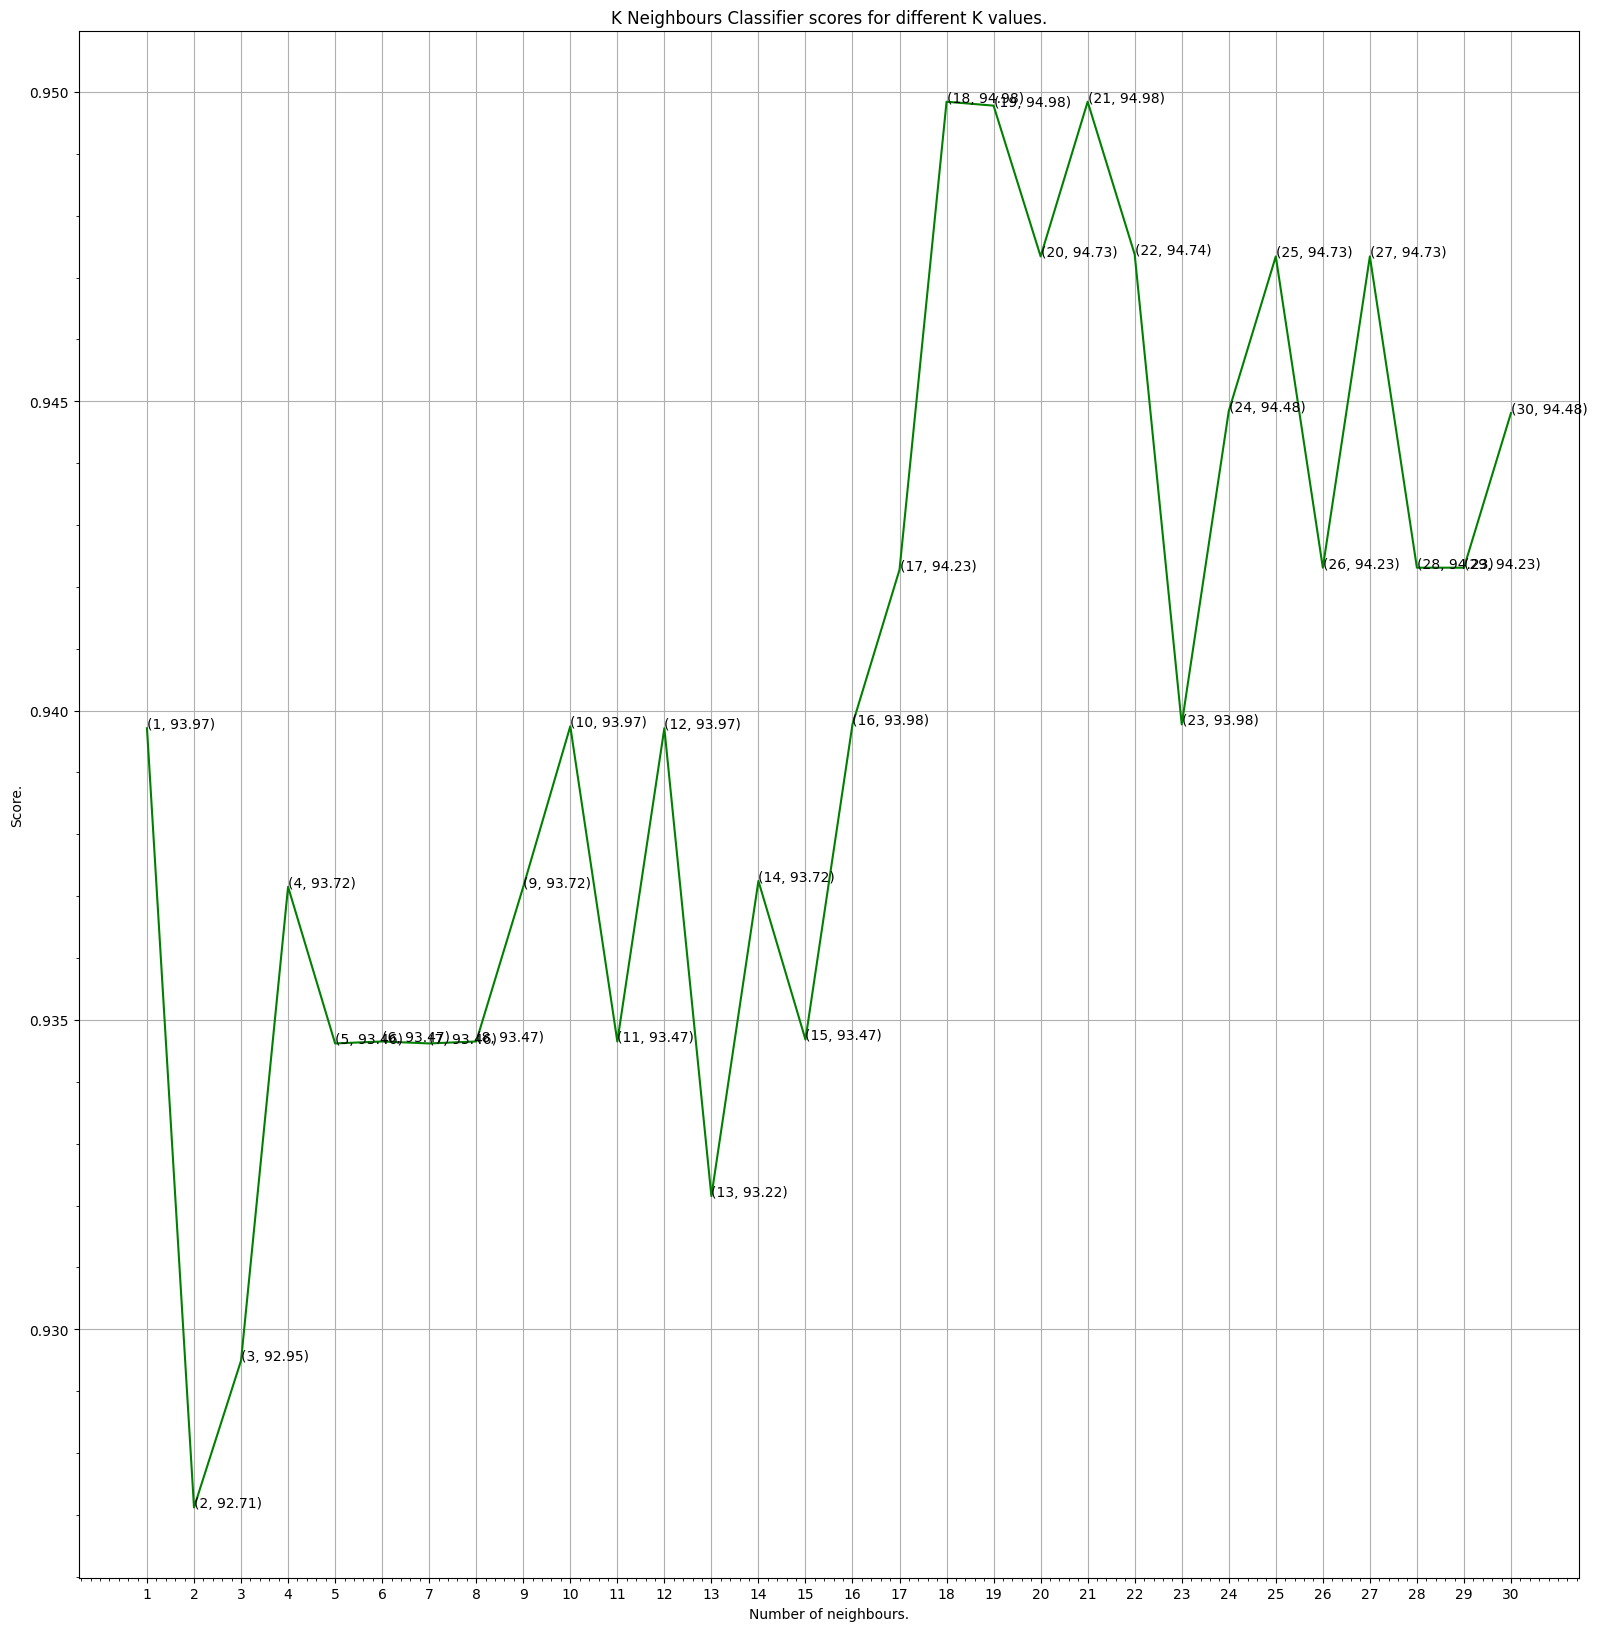

In [36]:
plt.figure(figsize=(16, 16))
plt.plot([k for k in range(1, 31)], knn_scores, color='green')
for i in range(1, 31):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100, 2)))
plt.xticks([i for i in range(1, 31)])
plt.tight_layout()
plt.minorticks_on()
plt.grid()
plt.title("K Neighbours Classifier scores for different K values.")
plt.xlabel("Number of neighbours.")
plt.ylabel("Score.")
plt.show()

In [37]:
highest_score_index = knn_scores.index(max(knn_scores)) + 1

In [38]:
print(f"Highest accuracy obtained: {round(max(knn_scores) * 100, 2)}%")
print(f"Since this was obtained at the k value of {highest_score_index}, we can go ahead for the test dataset as well.")

Highest accuracy obtained: 94.98%
Since this was obtained at the k value of 18, we can go ahead for the test dataset as well.


In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=highest_score_index)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [40]:
y_test_pred = knn_classifier.predict(X_test)
print(f"Accuracy on the test data: {accuracy_score(y_test, y_test_pred) * 100}")

Accuracy on the test data: 91.81286549707602


In [41]:
print(f"Precision: {round(precision_score(y_test, y_test_pred), 2) * 100}")
print(f"Recall: {round(recall_score(y_test, y_test_pred), 2) * 100}")
print(f"F1 Score: {round(f1_score(y_test, y_test_pred), 2) * 100}")

Precision: 88.0
Recall: 90.0
F1 Score: 89.0


In [42]:
print("Objective here would be to keep the precision score high. "
      + "So, we will have to improve the precision as much as possible so that we get fewer false positives.")

Objective here would be to keep the precision score high. So, we will have to improve the precision as much as possible so that we get fewer false positives.


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('knn', KNeighborsClassifier())
])

stratified_k_fold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

param_grid = {
    'feature_selection__k': range(5, 15),
    'knn__n_neighbors': range(15, 31),
    'knn__p': range(1, 15),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__leaf_size': range(10, 60, 10),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search_cv = RandomizedSearchCV(estimator=pipeline,
                                      param_distributions=param_grid,
                                      scoring='accuracy',
                                      n_iter=50,
                                      cv=stratified_k_fold_cv,
                                      random_state=0)

tuned_model = random_search_cv.fit(X_train, y_train)

In [44]:
best_knn_model = random_search_cv.best_estimator_
best_knn_model.fit(X_train, y_train)
y_test_pred = best_knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred)*100)

Accuracy: 94.15204678362574


Confusion matrix.


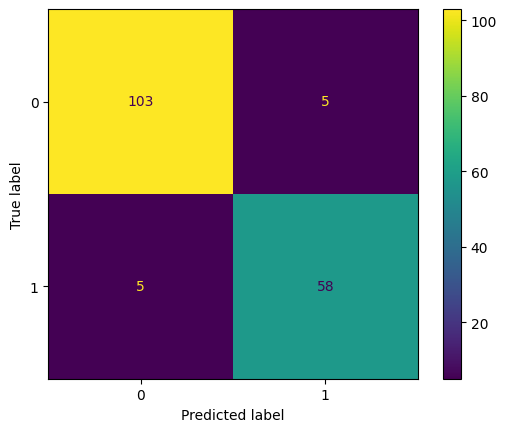

In [45]:
print("Confusion matrix.")
confusion_matrix_output = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix_output).plot()

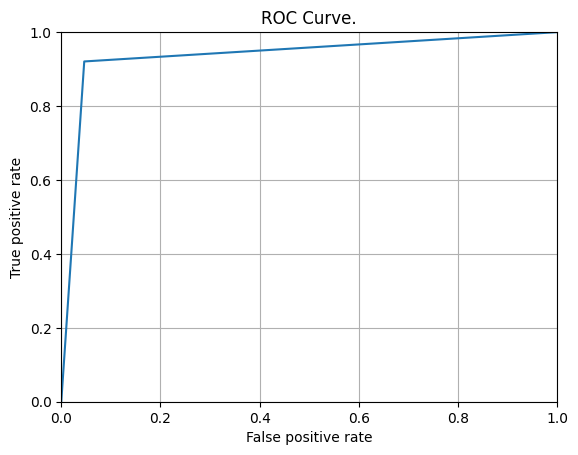

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve.")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()

In [47]:
print("Here, I'm using the permutation importance to determine how much the features are affecting the the target variable.")
perm_importance = permutation_importance(best_knn_model, X_test, y_test, n_repeats=30, random_state=0)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)
display(feature_importance)

Here, I'm using the permutation importance to determine how much the features are affecting the the target variable.


,feature,importance
11,area_worst,0.014230
9,radius_worst,0.012476
2,area_mean,0.010721
1,perimeter_mean,0.010526
0,radius_mean,0.009942
10,perimeter_worst,0.007992
8,area_se,0.002534
13,concavity_worst,0.002144
5,concave points_mean,0.001170
14,concave points_worst,0.000780


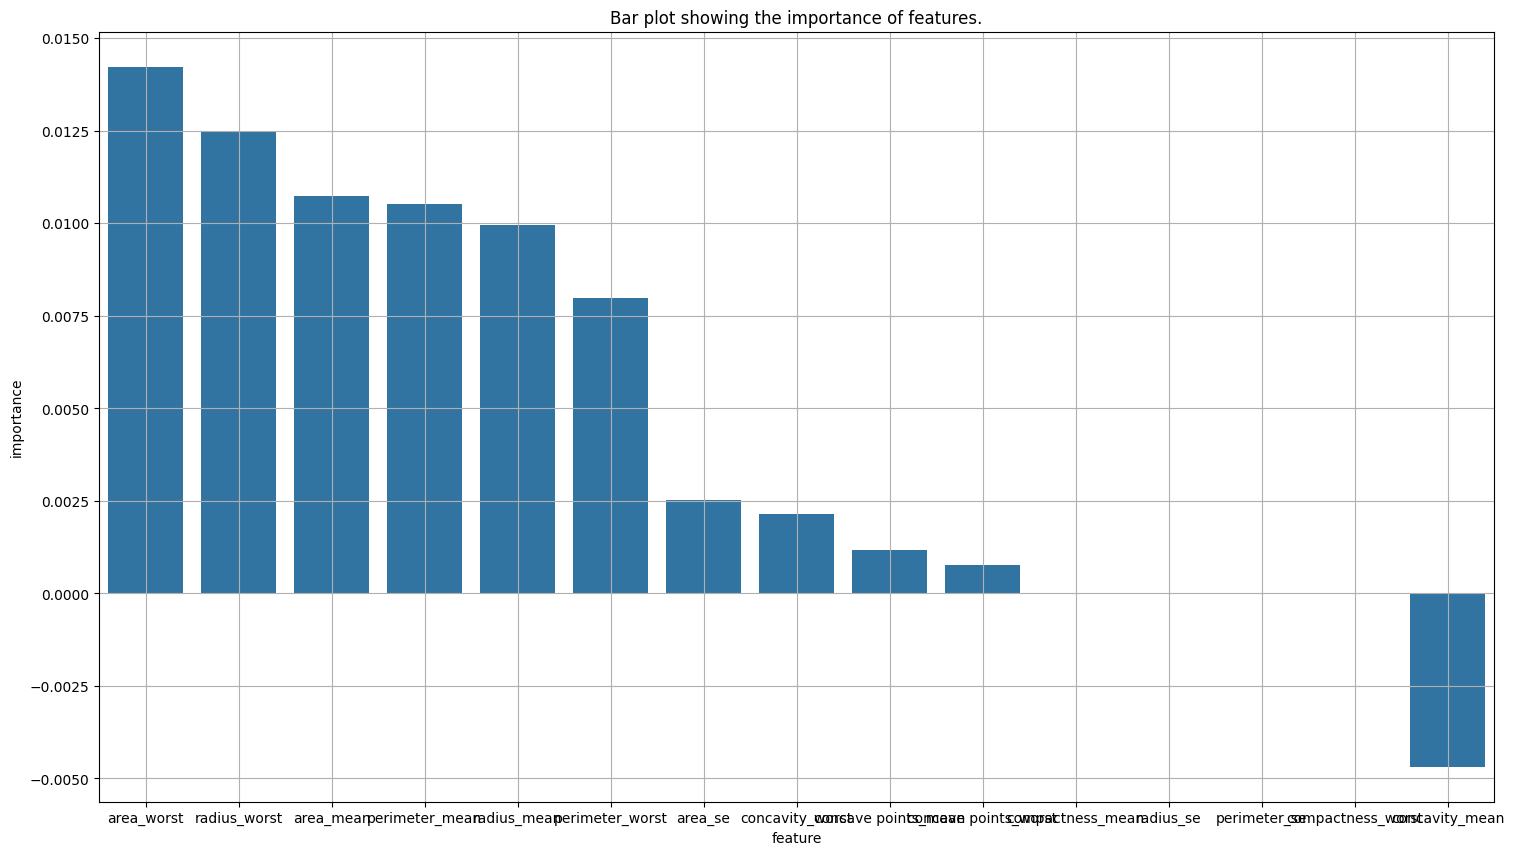

In [48]:
plt.figure(figsize=(18, 10))
sns.barplot(feature_importance, x='feature', y='importance')
plt.title("Bar plot showing the importance of features.")
plt.grid()
plt.show()

In [49]:
print("This gives us a pretty clear picture of the most important features. They are as follows:")
print(feature_importance.feature)

This gives us a pretty clear picture of the most important features. They are as follows:
11              area_worst
9             radius_worst
2                area_mean
1           perimeter_mean
0              radius_mean
10         perimeter_worst
8                  area_se
13         concavity_worst
5      concave points_mean
14    concave points_worst
3         compactness_mean
6                radius_se
7             perimeter_se
12       compactness_worst
4           concavity_mean
Name: feature, dtype: object


In [50]:
submission_dataframe = pd.DataFrame({
    'Index': X_test.index,
    'Diagnosis': y_test_pred
})

submission_dataframe.sort_values(by='Index', ascending=True, inplace=True)
submission_dataframe.head(2)

,Index,Diagnosis
31,1,1
166,7,1


In [51]:
submission_dataframe_file = '../d. Output Files/BreastCancer/' + 'BreastCancer_Prediction.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.sort_values(by='Index', inplace=True)
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: BreastCancer_Prediction.csv
